# Capstone Project - Predicting Traffic Accident Severity
### Applied DSc Capstone by IBM/Coursera

## Table of content
1. [Introduction](#intro)
2. [Data](#data)
3. [Data Cleaning](#clean)
4. [EDA](#eda)
5. [Data Preparation](#prep)
6. [Model Development](#modeling)
5. [Results](#results)

# 1. Introduction <a id='intro'>
Street traffic wounds are at present assessed to be the eighth driving reason for death over all age bunches all around the world and are anticipated to turn into the seventh driving reason for death by 2030.

Breaking down a huge scope of components, including climate conditions, unique occasions, roadworks, gridlocks among others, a precise forecast of the seriousness of the mishaps can be performed.

These bits of knowledge could permit law implementation bodies to apportion their assets all the more adequately ahead of time of possible mishaps, forestalling when and where serious mishaps can happen just as sparing both, time and cash. Moreover, this information on an extreme mishap circumstance can be cautioned to drivers with the goal that they would drive all the more cautiously or even change their course on the off chance that it is conceivable or to the medical clinic which might have set everything prepared for a serious intercession ahead of time.

Governments ought to be profoundly inspired by, exact expectations of the seriousness of a mishap, so as to diminish the hour of appearance and subsequently spare a lot of individuals every year. Others intrigued could be privately owned businesses putting resources into advancements meaning to improve street safeness.

This task comprises of a few sections separated into two unique note pads.

# 2. Data <a id='data'>
    
The original data for this project comes from the following [Kaggle data set](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016). In a previous notebook, [Feature Selection](http://localhost:8889/notebooks/Desktop/Coursera/Capstone/Feature%20Selection.ipynb), I performed a selection of the most relevant features for the prediction of traffic accident severity. 

The features of the dataset resulting are the following:

In the *characteristics* dataset, I will keep the features: "lighting", "localisation"(agg), "type of intersection", "atmospheric conditions", "type of collisions", "department", "adress", "time" and the coordinates. I added two new features from this original dataset: "date" and "weekend" indicating if the accident occurred during the weekend or not.

In the *places* dataset, I will keep only the features: "road categorie", "traffic regime", "number of traffic lanes", "road profile", "road shape", "surface condition", "situation", "school nearby" and "infrastructure".

From the *users* dataset, I have created the following features: 
+ num_us: total number of users involved in the accident.
+ ped: Wether there are pedestrians involved or not.
+ critic_age: If there is any user in between 17 and 31 y.o.
+ sev : maximum gravity suffered by any user involved in the accident:
    + 0 = Unscathered or Light injury
    + 1 = Hospitalized wonded or Death

I used the *holiday* dataset to craft a new feature indicating the accident accurred during a holiday.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# 3. Data Cleaning <a id='clean'>
    
Before starting to run any ML algorithm on the data, the data have to go through the preprocessing part. In this part, data will be cleaned so there is no missing or unusual value. The goal is that the data is the best possible before applying the algorithms.

### Importing Data 

In [2]:
df = pd.read_csv('Data/Data.csv', index_col=0)
df.head(10)

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday
0,201600000001,14.0,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,18.0,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,19.0,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,19.0,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,11.0,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0
5,201600000006,11.0,1,2,1,7.0,6.0,0.0,0,590,...,1.0,99.0,0,1,0,2,1,2016-12-23,0,0.0
6,201600000007,11.0,1,2,1,7.0,2.0,0.0,0,590,...,1.0,99.0,0,0,0,3,0,2016-05-01,1,1.0
7,201600000008,19.0,2,1,1,1.0,1.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-05-14,1,0.0
8,201600000009,19.0,1,2,1,1.0,3.0,0.0,0,590,...,1.0,99.0,0,0,0,2,1,2016-09-23,0,0.0
9,201600000010,10.0,1,1,1,9.0,6.0,0.0,0,590,...,1.0,0.0,0,1,0,2,1,2016-12-30,0,0.0


## Missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 29 columns):
ID           839985 non-null int64
time         839985 non-null float64
lum          839985 non-null int64
agg          839985 non-null int64
int          839985 non-null int64
atm          839930 non-null float64
col          839974 non-null float64
lat          362471 non-null float64
long         362467 non-null object
dep          839985 non-null int64
road_cat     839984 non-null float64
road_num     780914 non-null object
traf_reg     839187 non-null float64
num_lanes    838195 non-null float64
res_lane     838345 non-null float64
long_prof    838924 non-null float64
shape        838909 non-null float64
surf         838968 non-null float64
infra        838707 non-null float64
situation    838983 non-null float64
school       838709 non-null float64
crit_age     839985 non-null int64
ped          839985 non-null int64
dead_age     839985 non-null int64
num_us       839985

In [4]:
df['road_num'].describe()

count     780914.0
unique      2088.0
top            0.0
freq      439016.0
Name: road_num, dtype: float64

From the summary of the data we see that the data types are coherent with their respective values, with the only exception of the date, and that some features have missing values. 

+ The greater part of the qualities for the directions are missing, just as generally 10% of the information with respect to the road_num, and over half of the rest of the examples are a 0. Accordingly, to keep the quantity of tests the referenced highlights will be dropped. 

+ Few values are missing in some features such as the atmospheric conditions or road category.


Missing qualities and exceptions will be loaded up with the mark for *Other cases* classification if conceivable. If not the most regular estimation of the element will be applied.

In [5]:
df.drop(['lat', 'long', 'road_num'], axis=1, inplace=True)

In [6]:
print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 55 
Missing values in collision: 11 
Missing values in road_cat: 1 
Missing values in surf: 1017


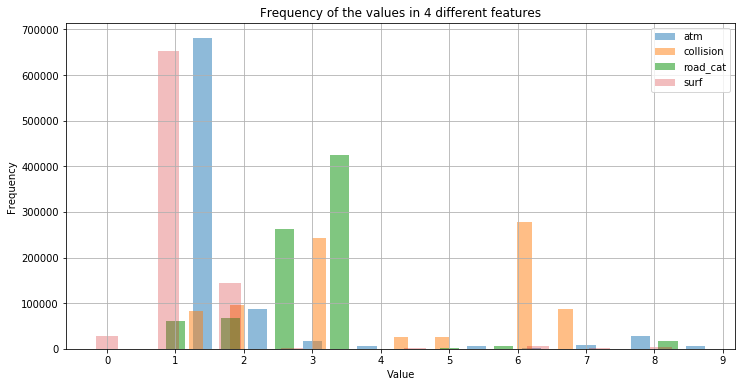

In [7]:
df['atm'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='atm')
df['col'].hist(alpha=0.5, rwidth=0.35, align='mid', label='collision')
df['road_cat'].hist(alpha=0.6, rwidth=0.35, align='left', label='road_cat')
df['surf'].hist(alpha=0.3,rwidth=0.35, align='left', label='surf')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend();

**The 0 value in the surface is the only outlier. The minimum number for all features is 1.**

In [8]:
df['atm'].fillna(9, inplace=True)
df['col'].fillna(6, inplace=True)
df['road_cat'].fillna(9, inplace=True)
df['surf'].fillna(9, inplace=True)
df['surf'].replace(0,9, inplace=True)
df.surf.value_counts()

1.0    652322
2.0    143254
9.0     32498
7.0      5474
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64

In [9]:
df[['traf_reg', 'num_lanes','res_lane', 'long_prof', 'shape', 'infra', 'situation']].describe()

,traf_reg,num_lanes,res_lane,long_prof,shape,infra,situation
count,839187.000000,838195.000000,838345.000000,838924.000000,838909.000000,838707.000000,838983.000000
mean,1.855246,2.039593,0.130675,1.135474,1.198732,0.438958,1.147201
std,0.720949,1.550779,0.555434,0.620295,0.722200,1.350905,0.722495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,99.000000,3.000000,4.000000,4.000000,7.000000,5.000000


Feature that all highlights contain nearly 0, aside from the NaN values.\
Concerning the number of paths, there are a few anomalies. The most extreme number of paths will be restricted to 6. 
Concerning foundation and the presence of a saved path close by, at any rate, 75% of qualities are 0. These two highlights will be drop as numerous qualities are obscure.

In [10]:
df.drop(['infra', 'res_lane'], axis=1, inplace=True)

In [11]:
df['num_lanes'].value_counts()

2.0     464716
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
14.0         6
24.0         6
70.0         5
22.0         5
31.0         3
60.0         3
17.0         2
16.0         2
53.0         2
27.0         2
45.0         2
41.0         1
44.0         1
33.0         1
29.0         1
52.0         1
39.0         1
28.0         1
36.0         1
62.0         1
42.0         1
76.0         1
65.0         1
84.0         1
23.0         1
91.0         1
54.0         1
18.0         1
86.0         1
99.0         1
Name: num_lanes, dtype: int64

In [12]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    573670
1.0    101345
4.0     76934
3.0     66252
6.0     13945
5.0      7839
Name: num_lanes, dtype: int64

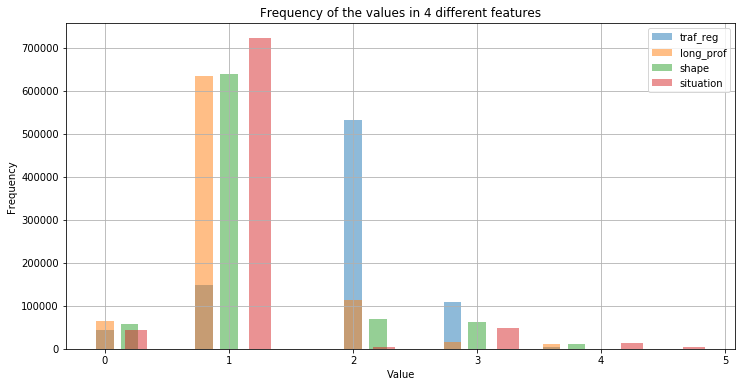

In [13]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

Most frequent value for the traffic situation, road profile and shape is 1, while for the traffic regime is 2. 

In [14]:
df['traf_reg'].fillna(0, inplace=True)
df['traf_reg'] = df['traf_reg'].replace(0,2)

df['long_prof'].fillna(0, inplace=True)
df['long_prof'] = df['long_prof'].replace(0,1)

df['shape'].fillna(0, inplace=True)
df['shape'] = df['shape'].replace(0,1)

df['situation'].fillna(0, inplace=True)
df['situation'] = df['situation'].replace(0,1)

Text(0.5, 1.0, 'School feature values')

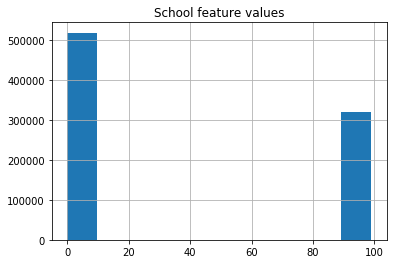

In [15]:
df.school.describe(),df.school.hist()
plt.title('School feature values')

In [16]:
df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

As it is depicted in the kaggle metadata the division include has a 0 added to one side. I will delete this 0 so the qualities run from 1 to 97.

In [17]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 24 columns):
ID           839985 non-null int64
time         839985 non-null float64
lum          839985 non-null int64
agg          839985 non-null int64
int          839985 non-null int64
atm          839985 non-null float64
col          839985 non-null float64
dep          839985 non-null int32
road_cat     839985 non-null float64
traf_reg     839985 non-null float64
num_lanes    839985 non-null float64
long_prof    839985 non-null float64
shape        839985 non-null float64
surf         839985 non-null float64
situation    839985 non-null float64
school       839985 non-null int64
crit_age     839985 non-null int64
ped          839985 non-null int64
dead_age     839985 non-null int64
num_us       839985 non-null int64
sev          839985 non-null int64
date         839985 non-null object
weekend      839985 non-null int64
holiday      839985 non-null float64
dtypes: float64(11), int32

# 3.EDA <a id=#eda>

This section is aiming to gain a better understanding of the data summarizing the main characteristics as well as uncovering importan relationships of the features with the severity of an accident.

### Target: Severity

The data is almost evenly distributed on both high and low severity accidents. 

Accidents classified in each level of severity:
0    471695
1    368290
Name: sev, dtype: int64


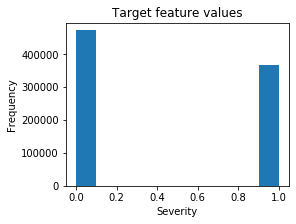

In [19]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

### Seasonality 

+ The quantity of car crashes diminished throughout the years from 2005 to 2013, after which the pattern became stable.

+ Examining the yearly pattern there is an occasional example where the quantity of mishaps increment around March and afterward again in September.

+ Concerning day of the week, there is certifiably not a noteworthy contrast between them. There is a consistent pattern during the week with more mishaps on Friday, and Sunday is the day with less mishaps of all.

+ Ultimately examining the mishaps every hour, there are obviously two spikes, one at 8 am, the time individuals go to work, and another somewhere in the range of 5 and 6 pm, when individuals get back. The quantity of mishaps diminishes between these two spikes, the same old thing however it demonstrates there is an example here.

In [20]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date.date

0        2016-02-01
1        2016-03-16
2        2016-07-13
3        2016-08-15
4        2016-12-23
            ...    
839980   2005-12-21
839981   2005-12-23
839982   2005-12-26
839983   2005-12-27
839984   2005-12-31
Name: date, Length: 839985, dtype: datetime64[ns]

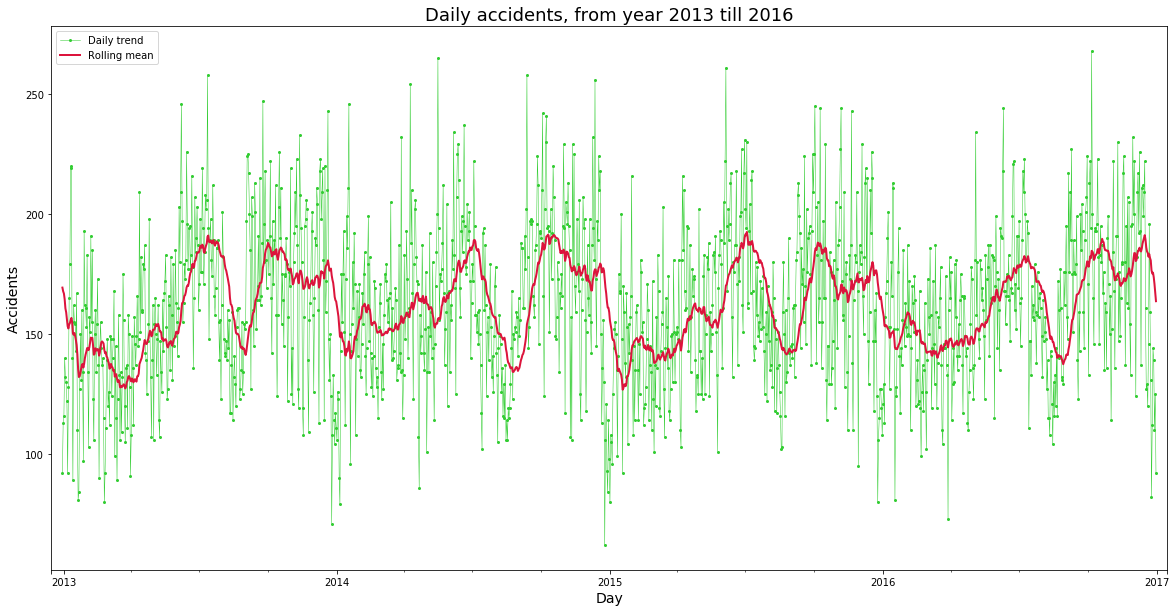

In [21]:
#Seasonality


date['year'] = df.date.dt.year
date['month'] = df.date.dt.month
date['weekday'] = df.date.dt.weekday
high_sev = date[date['sev']==1]

season = date[['date', 'ID']].groupby('date').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend',color = 'limegreen')
season['rolling'][365*8:].plot(color='crimson', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, from year 2013 till 2016', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2017-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

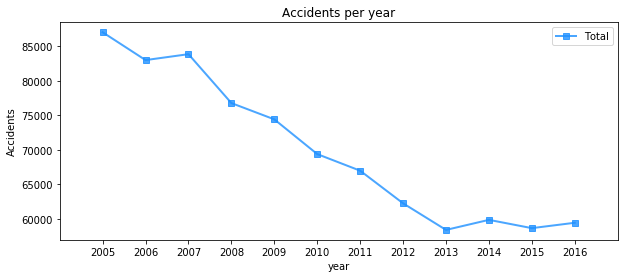

In [22]:
#By year

yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='s', linewidth=2, color='dodgerblue', label='Total',alpha = 0.8)
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend();

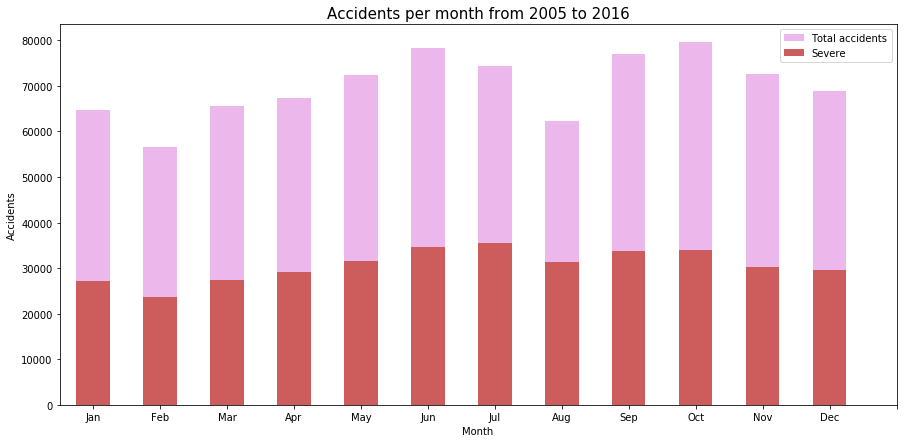

In [23]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(15,7), alpha=0.5, color='orchid', label='Total accidents')
monthly['high_sev'].plot.bar(color='indianred', label='Severe')

plt.title('Accidents per month from 2005 to 2016'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4cAAAG7CAYAAABwyuBpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde7xWZZ3//9cnUMTUVEBHxcSUzBMSIJ6+o6YjYGp4yNNMSWU/yrQ8VBNNzVfHw2T9ZsbJbDRTUxtLzTIZUwnN86iARuIhg0iFNEUQ0BQR/Xz/WNdm327ufRLuvTfwej4e63Hf61rXWve11r3R/d7Xta4VmYkkSZIkae32nu5ugCRJkiSp+xkOJUmSJEmGQ0mSJEmS4VCSJEmShOFQkiRJkoThUJIkSZKE4VCS2hWVP0VERsT2DfqMpyPi39qps0tpw/4N+PzNIuKsiBi0qo+9NomID5bruHGL8k+V726Dd3HMLSLilohY1Kjvf2VExOciYnJEvFDaeH9EjKpTLyLinyJiTkS8HhH3RMTQOvV2iog7IuK1iHguIs6OiF4t6jxdrkXt8pcOtPUfV9X1i4iNIuJfImJKOe+/RMSNEfHBOnXfFxE/ioiXS91rIqJfizoHRcRPa87trDY++8iImFqu4/yIuC0i3rsqzkvS2s1wKEnt2wsYVN4f16DPOAK4sEHH7ojNgDNpPk+9Ox+kuo4bt1exE74B7AYcT/Wz+MgqPPaq8A3gT8DngI8Ds4DbIuJjLepNAP4Z+DZwGPAqcHtE/E1ThYjYBLgdSGAscDbwZeBf6nzuT6iuR9Py0Q609R+B/Tt4Xu15P/D/AZOozvtzwBbAQxGxdYu615XP/SzwKWB34Jct6owBhgB3AK+19qER8Vmqc78VOLgccybQe2VORpLA/5BIUkccD/wVeKy8P3dVf0Bm/nZVH3NNFBHrAG9n5lvd3ZYu9CHgocy8pbUKpWetV2Yu7bpmLTcsM1+qWZ8cEYOB04GJpX3rUYXDb2XmRaXsAeBp4BTgm2XfzwN9gSMzc3E51kbAWRHxnVLW5PnMfLCB59WePwHbZebrTQURcS/wLPAZSqCNiL2A0cB+mXlPKfszVYj8u8y8vez+1cz8ctk+tt4HRkR/4ALgi5n5w5pNN67SM5O01rLnUJLaUH7pPprql9wrgJ0iYkidetuUIWEvleFwj0bE39ds7xsR34mIZyLijTJM9Vs121cYVhoRXyhD8P4aEf9D1SvR8nPfExETImJWOe4fImJcizp3RcQNEfH3pd7iiLg1IgaW7YOAGaX6nU3D9Mq2dSLi3yLi2XL858rQuXXbuGZXRsS0iDg8In4fEUsi4r6I2Gkl2j4+Iv4ILAG2bOVzm+p+ulzfVyPixxHRJyJGluF/r5Z672+xb/+IuKoM0Xut1BnRos7T5VqcHhFzyxDBa6MMIY1quOL/lOpNw5CfbtHMbaMagvnXcm2ObO06lmMmcCBwRO3xWlzjx8t12aNsGxrNwzJfjmoI4+Y1xxxUjnVcVEMdF5fz+UTZ/o/le54XEd+OiDZ/V2gRDJv8lqo3usnewEbA9TX7/bVcr4Nr6h0MTGoRAq+lCoz7tdWO9pRr1w84M5qHou5ftq0fERdGNTR0SVRDNlcYGlsrM/9aGwxL2QLgGd557gcDLzQFw1JvClW4PLim7O0OnMYx5fWqDtSVpE4zHEpS2w4ANqf6BfUG4E2q3sPlImIz4AGqoWJfoRoydzmwddkewE3AScD3qYa/nQn0b+1Do+o5+D5wM3AkVXi7ok7V71H1ulwKHELVg3BFRBzaot4eVD00XwbGA8PKPgDPA/9Q3p9M8zA9gK+Xbf8MHAScBiwC3nEPWB3bAP8BnAP8PfA+YFJUPUidbfs+VNfua1TXdlEbn7snMA74ItUQwmPK5/wQ+C7wCeADNefe5JdUvTtfAY6l+v/jnbHiPabHUIW18aU9hwL/WrY9UvaH6jvbi2q4cK2fUP2h4QiqoYDXNoX0VuxFFbTurHO8QcB3gG9R/Uz9KSIGAHcB61Nd9y9SharJdQL9t6m++6OAe4GrIuLfgZFUPV//SfM17Ky9gCdq1j8EvEV1zrWeLNtq6/2+tkJmPks1zLK2HsBnImJpVPfw3RAR27TTpiOofnYup/lnvGmI7g+BTwPnlXpzgF9FxP9p55jvUK7/9qx47r+vU73luXfEHsBTwIkl0L8ZEQ9FxN6dPI4k1ZeZLi4uLi6tLFSB7GVg3bL+K6q/+EdNnW9RDTvdopVjjKa6h+pjbXzO08C/1axPAW5tUeeH5Tj7l/XtgbeBcS3qXQ1MrVm/i+qX4k1qyk4rx+pb1nepPXZNvZuBf+/kNbuyHGvvmrJtgGXA599F218H/qYDn3sXsBB4X03Z9aUt+9aUfaGUrV/Wx5T1/WrqvBeYB/ygxXf0R6B3Tdl/An+pWT+0HGtQi7Z9qpR/pqasX+01aee8bmjlGg9tUX5+uQYb1ZSNLHWPL+uDyvqPaupsRPWHj5lUw1Nrfw6v6+T3/5ly/I/UlH0DWFin7mdL3aZ/X28Cp9WpNxf415r171L9keZvqYL6n6mGc76vnba9BJzVomzHlj+LVH8ceIyqF7Mz5341MB/oV1M2Gfhlnbr/DfxvR9tZyicBr5Tz/Yfys/sbYDGweWfa6uLi4lJvsedQkloREX2oehFuzOZ7uX5K9cv1njVVDwBuy8znWznUAcCCzJzYwc/tBXyYqrex1i9arB9I9UvtjRHRu2mhmtBiaLxzhsepmflyzXpTz8ZW7TRnOvCpMtRwSOkF7YgXM/N/m1Yy8xngYaqg0tm2P5yZ7c5EWUzLzNqexVnAUuC+FmXQPDx1JDAvM++uae9fqYJxy56jOzNzWc36E8BmbQ2zbeHXNZ8xH3gRaKvnsC1/zszpLcpGAr/OmmGZWQ1hfJoVz+WOmjqLqcLw3fnO+zln0f7PyHIRMZyqp/a7mXlni81Zb5c621qrt7w8M0/NzJ9m5r2ZeSnVH2C2pOr966zdy/F/VnP8t8t6h3sOI+Ikqp7pz5bvtla759RB7wE2AE7MzGsy8zbgcKpe2VM6eSxJWoHhUJJadzDVrJO3RMTG5d6yu4A3eOfQ0n5Uw/Na0972lgZQTRj2Yovyluv9qYZ3LqLqcWlariz7196juLDFvk1hdz3adi7V8NYvAL8D5kTEqe2ewYptbSpralNn2v5CBz6vSb3zfCXfeT9Xy3PfopXPeAHYtAPHD6Cj4bDe/u19B62p1+aVPZd33b6I+ABVz/odVMOXa70MbNgi9EP17+u1zHyzpl69mV7fV6dty2XmY1TDLYd1pK0tbAG8mpktZwh9AVi//JGoTVHNzPo94GuZ2XJymNbOaWPaOKdWLCivdzUVlGD/MLBTvR0kqTOcrVSSWtcUAH9WZ9sxEXF66WWZT53JYmq0t72leVTDDTdrUd5yfUGptw9VL1xL9QJap2TmEuD/Av83qhkoPw/8Z0Q8VXotWtOyrU1lj5f3nWl7Z3tXOut56rd3c5p/Ge+J6l2Xts7l4UY1pNx3O4lqMpbjcsXZZH9P9ceA7alCXJOW9+P9nhb34UX1WIj3Uv++vZbezc/K88AGEbF+i4C4OVVwfaOtncv9ftcCl2Tm/1+nyu+phr+29CFWfJxFe56kOseWPfhB/X9HktQp9hxKUh1RPaz8UKphpB9psZxB9YvjR0r1O4DRtTNCtnAHsGmdiVbqKr9YT6d6zlutljNb/obqF+73Zea0OktnHmvQbk9iZs6kmnDlDdrvpdisdpKMMjvoMKp72FZ121fWQ6W9+9a0d32qSXLua3Wv+jraI9soD1H9LG7YVBARu1MNhe7suXRI+bfS9JiNQ+v0wAH8L9V9cUfX7Lc+1QRDt9bUu5UW7aeaIOh14G5aERG7ADvQfgCu1xM6lSpwfbzmeFHW27xmEbEz1fDj24AvtVLtVuBvaie3KTPhfoB3nntH3EwVBJv+20NEvA8YTtWzL0krxZ5DSapvLNWMj9/NzIdqN0TE/VQTbBxP9cDuC4ATgHsj4jyqmQ53BN6bmd+hmpBiEvCTiDibaobELagmSflcK5//r8AvIuJiqlk896OafGK5zHwqIi6hmvHyO8A0ql98dwY+mJmf7cT5Pkv1C/i4iFgEvJmZ0yLiRqpfuH9btn+c6v8d97R6pMpLwI8j4p/LfmdT9QZe2YC2r5TMnFS+0+siYgJVT+9XqB6fUK8nqC1NvWKfi4hrqXqeZrS1wyr2H1Qzu06KiG9T3Z92PtVstz9v0Gf+gurh7Z8CtouI7Zo2ZHkOYWYuiYjzgX+OiJepetPOoPoj9fdqjnUJVcj6RWn/B4CzgP9ouo8yIg6hurfvZuA5qh64b1L9DF/ZTlt/DxwSEbcBrwJPZeaTEfFT4KKonqk4i+rh9h+iupZ1ld7SpuNcCIysuSV3cWY+Uc79gYiYBFwdEV+h6uH7NnBfNj/jkDLb6u5ldV2qx+Z8HPhrZt5ajjUtIm4CLi8/qy9RzSj7JtXwb0laOd09I46Li4tLT1yofvH8Qxvb/4vqXqI+ZX0b4LpS9hrVX/GPq6nfF/g3qlkX36Ca8fS8mu1PUzNbaSk7pdR/japnZhQtZhSl6kU4jWq45huUSUWAE2rq3MWKs13uX461S03ZPwB/oOpdyVL2VargtohqlsSHgLHtXLsryz5HluO9Adxf+1kr0/Y2PrfeeZ4FvNSBcx9ANdPkyzT3Uu3eYr9639GnyrE2qCn7MtXwymXA063Va+2YHTyvK6km36lX/8NUPbOvUd3T9hNqZrKkebbSQztwfq1+Tk2dbG2p831/g+pn+nWqx2d8uM7xdirtf51qyOc5vHMG1SFUvfHzqELRX0o7t+zAz8hw4EGq2YVrZ/5dnyqkvlB+FqcBo9s5VtPPUb3lrhZ1NwZ+VL6PxeU76d/Kz1LL5ekW9TYALqb6I8brVH+g2rUj/0ZcXFxc2lsis9G3ckiS1iYRcSVV8BrRXl1JktRzeM+hJEmSJMlwKEmSJEnCYaWSJEmSJHsOJUmSJEmshY+y6N+/fw4aNKi7myFJkiRJ3eLhhx9+KTMHtCxf68LhoEGDmDZtWnc3Q5IkSZK6RUQ8U6/cYaWSJEmSJMOhJEmSJMlwKEmSJEliLbznUJIkSVLHvfnmm8ydO5clS5Z0d1PUSeuttx4DBw5knXXW6VB9w6EkSZKkVs2dO5cNN9yQQYMGERHd3Rx1UGYyf/585s6dy7bbbtuhfRxWKkmSJKlVS5YsoV+/fgbD1UxE0K9fv071+BoOJUmSJLXJYLh66uz3ZjiUJEmSJHnPoSRJkqSOm3/bvFV6vH5jBrT+WfPnc+CBBwLwl7/8hV69ejFgQFV/ypQprLvuuu+ov2DBAq6//no+//nPt/mZy5Yto3///ixcuHAlW1/f6NGjueGGG9hwww3fUf7Nb36T/v37c9ppp3X6mLNnz2bKlCkcd9xxq6qZK7DnUJIkSVKP1K9fP6ZPn8706dP5/Oc/z+mnn758vWUwhCocXnLJJd3Q0neaNGnSCsFwZc2ePZtrr712lR6zJcOhJEmSpNXOd77zHXbZZRd22WUXvve97wEwYcIEnnrqKYYOHcqECRNYvHgxBxxwAMOGDWPIkCHcfPPN7R73sMMOY/jw4ey8885cdtlly8t/9atfMWzYMHbbbTdGjRoFwCuvvMK4cePYddddGTJkCL/85S8BGDhw4PJeybPPPpsddtiBgw46iJkzZy4/3syZMxk9ejTDhw9n33335Q9/+AMAn/jEJzj11FPZe++9+cAHPsCNN964/NzuvPNOhg4dyoUXXsiMGTPYfffdGTp0KEOGDGH27NkrfU0bOqw0Ik4HPgskMAP4NLAFcC2wKfAI8MnMXBoRfYCrgeHAfODYzHy6HOfrwInAW8CXMnNSKR8DfBfoBVyWmec38nwkSZIkdb8pU6ZwzTXXMGXKFN566y1GjhzJfvvtx/nnn8+sWbOYPn06UD2j8aabbmLDDTfkxRdfZJ999uHQQw9t89hXXXUVm266Ka+99hojRozgqKOO4o033uCkk07i3nvvZZtttmHBggUAnHXWWQwYMIAZM2aQmSsMU50yZQo///nPmT59OkuXLmXo0KHstddeAIwfP57LLruM7bbbjvvvv59TTjmFX//61wC8+OKL3H///cyYMYNjjjmGI444gvPPP5+LLrpoeQA96aST+MpXvsKxxx7LG2+8QWau9HVtWDiMiK2ALwE7ZebrEXE9cBzwUeCCzLw2Ii6hCn0Xl9eXM3P7iDgO+DZwbETsVPbbGdgSuD0iPlg+5vvAQcBcYGpETMzMJxp1TpIkSZK637333stRRx3F+uuvD8Dhhx/Offfdt7xHr0lm8rWvfY377ruP97znPcyZM4eXXnqJjTfeuNVjX3DBBUycOBGonvH4xz/+kTlz5vCRj3yEbbbZBoBNN90UgNtvv315WIsINtlkk3cc65577uGoo46ib9++9O3bl8MOOwyAhQsX8uCDD3LUUUctr7ts2bLl7w8//HAigiFDhvDnP/+5bjv33ntvzj33XJ555hmOPPJItt9++/YvXDsaPay0N9A3InoD6wPPAwcAN5TtVwGHl/djyzpl+4FRzb06Frg2M9/IzD8Bs4CRZZmVmbMzcylVb+TYBp+PJEmSpG7W0V6yq6++mkWLFvHII48wffp0+vfv3+Zz/26//XbuueceHnzwQX73u98xZMgQlixZQmbWfSxEa+W1Wtuvf//+y++fnD59Oo899tjy7X369HlH3Xo++clPcuONN9KnTx8OOugg7rnnnjbb0RENC4eZ+Wfg34BnqULhIuBhYGFmNsXiucBW5f1WwJyy77JSv19teYt9WitfQUSMj4hpETFt3rxVO7uSJEmSpK617777cuONN/L666/z6quvctNNN/G3f/u3bLjhhrzyyivL6y1atIjNNtuM3r17M3ny5FZ74Wrrb7rppvTt25fHH3+cqVOnArDPPvvwm9/8hmeeeQZg+bDSUaNGcdFFFwFViHv55ZdXaOcvfvELlixZwuLFi5ff87jJJpuwxRZbLL+f8O233+Z3v/tdm21reW6zZ89m++2359RTT+WQQw7h0Ucfbfe6taeRw0o3oerJ2xZYCPwMOLhO1aYoXC9yZxvl9YJt3VidmZcClwKMGDFi5QfjSpIkSWupth490VVGjhzJ8ccfz+677w5U99/tuuuuAIwYMYJdd92VQw45hDPOOIPDDjuMESNGMGzYMAYPHtzmcQ855BAuvfRSdtttNz70oQ+xxx57ALD55ptz8cUXM3bsWDKTLbfckltvvZUzzzyTL3zhC+yyyy706tWLc845h4997GPvaOcRRxzBbrvtxqBBg9h3332Xb7v22ms56aSTOOuss1i6dCmf+MQn2G233Vpt24c//GHeeustdtttN0488UQWL17MT3/6U9ZZZx223HJLzj333Hd9PZvEqrhxse6BI44GxmTmiWX9BGAv4GjgbzJzWUTsBZyVmaMjYlJ5/0AZhvoXYAAwASAzv1WOMwk4q3zMWZk5upR/vbZea0aMGJHTpk1btScrSZKkVWJVP0Pv3egJ4acnefLJJ9lxxx27uxl6l+p9fxHxcGaOaFm3kfccPgvsGRHrl3sHDwSeAO4EPl7qjANuKu8nlnXK9t9klVwnAsdFRJ+I2BYYDEwBpgKDI2LbiFiXatKaiQ08H0mSJElaYzVsWGlmPhQRN1A9rmIZ8FuqoZ2/Aq6NiHNL2eVll8uBH0fELGABVdgjMx8vM50+UY5zcma+BRARpwCTqB5lcUVmPt6o85EkSZKkNVlDn3OYmWcCZ7Yonk0102jLukuohpzWO855wHl1ym8Bbln5lkqSJEnS2q3Rj7KQJEmSJK0GDIeSJEmSpMYOK5UkCXrG7IPgDISSJLXFcChJkiSpwx755CdX6fGG/fjH7dY577zz+MlPfkKvXr14z3veww9+8IPlzyDUqmM4lCRJktRjPfDAA9x888088sgj9OnTh5deeomlS5c25LOWLVtG795rb0TynkNJkiRJPdbzzz9P//796dOnDwD9+/dnyy235OGHH2a//fZj+PDhjB49mueff54nn3ySkSObH4zw9NNPM2TIEIC69QH2339//umf/on99tuP7373u8ybN4+jjjqK3Xffnd13353777+/60+6mxgOJUmSJPVYo0aNYs6cOXzwgx/kC1/4AnfffTdvvvkmX/ziF7nhhht4+OGH+cxnPsM3vvENdtxxR5YuXcrs2bMBuO666zjmmGNard9k4cKF3H333Xz5y1/m1FNP5fTTT2fq1Kn8/Oc/57Of/Wx3nXqXW3v7TCVJkiT1eBtssAEPP/ww9957L3feeSfHHnss3/zmN3nsscc46KCDAHjrrbfYYostADjmmGO4/vrrmTBhAtdddx3XXXcdTz31VKv1AY499tjl72+//XaeeOKJ5euLFy/mlVdeYcMNN+yK0+1WhkNJkqRu1hNm9HU2X/VkvXr1Yv/992f//fdn11135fvf/z4777wzDzzwwAp1jz32WI4++miOPPJIIoLBgwczY8aMVusDvPe9713+/u233+aBBx6gb9++DTufnsphpZIkSZJ6rKeeeoqZM2cuX58+fTo77rgj8+bNWx723nzzTR5//HEAtttuO3r16sU555yzvEdwhx12aLV+S6NGjeKiiy56x+etLew5lCRJktRhHXn0xKr06quv8sUvfpGFCxfSu3dvtt9+ey699FLGjx/Pl770JRYtWsSyZcs47bTT2HnnnYGq9/CrX/0qf/rTnwBYd911ueGGG1qtX+vCCy/k5JNPZsiQISxbtox9992XSy65pEvPubtEZnZ3G7rUiBEjctq0ad3dDElaq/SEIXPgsDn1XD3h30hP+ffhteh5nnzySXbcccfubobepXrfX0Q8nJkjWtZ1WKkkSZIkyXAoSZIkSTIcSpIkSWrH2nYr2pqis9+b4VCSJElSq9Zbbz3mz59vQFzNZCbz589nvfXW6/A+zlYqSZIkqVUDBw5k7ty5zJvX/ZMFqXPWW289Bg4c2OH6hkNJkiRJrVpnnXXYdtttu7sZ6gIOK5UkSZIkGQ4lSZIkSQ4rlSSpS/WEB3yDD/mWJK3InkNJkiRJkuFQkiRJkmQ4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIk4XMOJUmSpB6pJzwX1Weirl0Mh5LUID3hf+rg/9glSVLHOKxUkiRJkmQ4lCRJkiQZDiVJkiRJGA4lSZIkSRgOJUmSJEkYDiVJkiRJGA4lSZIkSTQwHEbEDhExvWZZHBGnRcSmETE5ImaW101K/YiICyNiVkQ8GhHDao41rtSfGRHjasqHR8SMss+FERGNOh9JkiRJWpM1LBxm5lOZOTQzhwLDgdeAG4EJwB2ZORi4o6wDHAwMLst44GKAiNgUOBPYAxgJnNkUKEud8TX7jWnU+UiSJEnSmqyrhpUeCPwxM58BxgJXlfKrgMPL+7HA1Vl5ENg4IrYARgOTM3NBZr4MTAbGlG0bZeYDmZnA1TXHkiRJkiR1QleFw+OAn5b3m2fm8wDldbNSvhUwp2afuaWsrfK5dcpXEBHjI2JaREybN2/eSp6KJEmSJK15Gh4OI2Jd4GPAz9qrWqcs30X5ioWZl2bmiMwcMWDAgHaaIUmSJElrn67oOTwYeCQzXyjrL5QhoZTXF0v5XGDrmv0GAs+1Uz6wTrkkSZIkqZO6IhweT/OQUoCJQNOMo+OAm2rKTyizlu4JLCrDTicBoyJikzIRzShgUtn2SkTsWWYpPaHmWJIkSZKkTujdyINHxPrAQcDnaorPB66PiBOBZ4GjS/ktwEeBWVQzm34aIDMXRMQ5wNRS7+zMXFDenwRcCfQFbi2LJEmSJKmTGhoOM/M1oF+LsvlUs5e2rJvAya0c5wrgijrl04BdVkljJUmSJPVI82/r/kkl+41Z8+cu6arZSiVJkiRJPZjhUJIkSZJkOJQkSZIkGQ4lSZIkSRgOJUmSJEkYDiVJkiRJNPhRFpLWPj1hqmlYO6abliRJWpXsOZQkSZIkGQ4lSZIkSYZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkSPudQWiV8tp8kSZJWd/YcSpIkSZIMh5IkSZIkw6EkSZIkCe857DTvLZMkSZK0JrLnUJIkSZJkOJQkSZIkGQ4lSZIkSRgOJUmSJEkYDiVJkiRJGA4lSZIkSRgOJUmSJEkYDiVJkiRJGA4lSZIkSRgOJUmSJElA7+5ugCRJWjvNv21edzcBgH5jBnR3EySpR7DnUJIkSZJkOJQkSZIkGQ4lSZIkSRgOJUmSJEkYDiVJkiRJGA4lSZIkSTQ4HEbExhFxQ0T8PiKejIi9ImLTiJgcETPL6yalbkTEhRExKyIejYhhNccZV+rPjIhxNeXDI2JG2efCiIhGno8kSZIkraka3XP4XeC2zPwQsBvwJDABuCMzBwN3lHWAg4HBZRkPXAwQEZsCZwJ7ACOBM5sCZakzvma/MQ0+H0mSJElaIzUsHEbERsC+wOUAmbk0MxcCY4GrSrWrgMPL+7HA1Vl5ENg4IrYARgOTM3NBZr4MTAbGlG0bZeYDmZnA1TXHkiRJkiR1QiN7Dj8AzAN+FBG/jYjLIuK9wOaZ+TxAed2s1N8KmFOz/9xS1lb53DrlK4iI8RExLSKmzZs3b+XPTJIkSZLWMI0Mh72BYcDFmflh4K80DyGtp979gvkuylcszLw0M0dk5ogBAwa03WpJkiRJWgs1MhzOBeZm5kNl/QaqsPhCGRJKeX2xpv7WNfsPBJ5rp3xgnXJJkiRJUic1LBxm5l+AORGxQyk6EHgCmAg0zTg6DripvJ8InFBmLd0TWFSGnU4CRkXEJmUimlHApLLtlYjYs8xSekLNsSRJkiRJndC7wcf/InBNRKwLzAY+TRVIr4+IE4FngaNL3VuAjwKzgNdKXTJzQUScA0wt9c7OzAXl/UnAlUBf4NaySJIkSZI6qaHhMDOnAyPqbDqwTt0ETm7lOFcAV9QpnwbsspLNlCRJkqS1XqOfcyhJkiRJWg0YDiVJkiRJhkNJkiRJkv8GtRkAAB7jSURBVOFQkiRJkoThUJIkSZKE4VCSJEmShOFQkiRJkoThUJIkSZKE4VCSJEmShOFQkiRJkgT07u4GaPU1/7Z53d0EAPqNGdDdTZAkSZJWe/YcSpIkSZIMh5IkSZIkw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiQJw6EkSZIkCcOhJEmSJAnDoSRJkiSJBofDiHg6ImZExPSImFbKNo2IyRExs7xuUsojIi6MiFkR8WhEDKs5zrhSf2ZEjKspH16OP6vsG408H0mSJElaU3VFz+FHMnNoZo4o6xOAOzJzMHBHWQc4GBhclvHAxVCFSeBMYA9gJHBmU6AsdcbX7Dem8acjSZIkSWue7hhWOha4qry/Cji8pvzqrDwIbBwRWwCjgcmZuSAzXwYmA2PKto0y84HMTODqmmNJkiRJkjqh0eEwgV9HxMMRMb6UbZ6ZzwOU181K+VbAnJp955aytsrn1ilfQUSMj4hpETFt3rx5K3lKkiRJkrTm6d3g4++Tmc9FxGbA5Ij4fRt1690vmO+ifMXCzEuBSwFGjBhRt44kSZIkrc0a2nOYmc+V1xeBG6nuGXyhDAmlvL5Yqs8Ftq7ZfSDwXDvlA+uUS5IkSZI6qWHhMCLeGxEbNr0HRgGPAROBphlHxwE3lfcTgRPKrKV7AovKsNNJwKiI2KRMRDMKmFS2vRIRe5ZZSk+oOZYkSZIkqRMaOax0c+DG8nSJ3sBPMvO2iJgKXB8RJwLPAkeX+rcAHwVmAa8BnwbIzAURcQ4wtdQ7OzMXlPcnAVcCfYFbyyJJkiRJ6qSGhcPMnA3sVqd8PnBgnfIETm7lWFcAV9QpnwbsstKNlSRJkqS1XHc8ykKSJEmS1MMYDiVJkiRJhkNJkiRJkuFQkiRJkoThUJIkSZKE4VCSJEmShOFQkiRJkoThUJIkSZKE4VCSJEmShOFQkiRJkkQnw2FEbBIRQxrVGEmSJElS92g3HEbEXRGxUURsCvwO+FFE/EfjmyZJkiRJ6iod6Tl8X2YuBo4EfpSZw4G/a2yzJEmSJEldqSPhsHdEbAEcA9zc4PZIkiRJkrpBR8LhvwCTgFmZOTUiPgDMbGyzJEmSJEldqXcH6jyfmcsnocnM2d5zKEmSJElrlo70HH6vg2WSJEmSpNVUqz2HEbEXsDcwICLOqNm0EdCr0Q2TJEmSJHWdtoaVrgtsUOpsWFO+GPh4IxslSZIkSeparYbDzLwbuDsirszMZ7qwTZIkSZKkLtaRCWn6RMSlwKDa+pl5QKMaJUmSJEnqWh0Jhz8DLgEuA95qbHMkSZIkSd2hI+FwWWZe3PCWSJIkSZK6TUceZfE/EfGFiNgiIjZtWhreMkmSJElSl+lIz+G48vrVmrIEPrDqmyNJkiRJ6g7thsPM3LYrGiJJkiRJ6j7tDiuNiPUj4ptlxlIiYnBEHNr4pkmSJEmSukpH7jn8EbAU2LuszwXObViLJEmSJEldriPhcLvM/A7wJkBmvg5EQ1slSZIkSepSHQmHSyOiL9UkNETEdsAbDW2VJEmSJKlLdWS20jOB24CtI+IaYB/gU41slCRJkiSpa3VkttLJEfEIsCfVcNJTM/OlhrdMkiRJktRlWg2HETGsRdHz5fX9EfH+zHykcc2SJEmSJHWltnoO/728rgeMAH5H1XM4BHgI+D+NbZokSZIkqau0OiFNZn4kMz8CPAMMy8wRmTkc+DAwq6saKEmSJElqvI7MVvqhzJzRtJKZjwFDG9ckSZIkSVJX68hspU9GxGXAf1M9zuITwJMNbZUkSZIkqUt1pOfw08DjwKnAacATpaxDIqJXRPw2Im4u69tGxEMRMTMirouIdUt5n7I+q2wfVHOMr5fypyJidE35mFI2KyImdLRNkiRJkqR3ajccZuaSzLwgM48oywWZuaQTn3Eq7+xp/DZwQWYOBl4GTizlJwIvZ+b2wAWlHhGxE3AcsDMwBvivEjh7Ad8HDgZ2Ao4vdSVJkiRJndRqOIyI68vrjIh4tOXSkYNHxEDgEOCysh7AAcANpcpVwOHl/diyTtl+YKk/Frg2M9/IzD9RTYYzsiyzMnN2Zi4Fri11JUmSJEmd1NY9h6eW10NX4vj/CfwjsGFZ7wcszMxlZX0usFV5vxUwByAzl0XEolJ/K+DBmmPW7jOnRfke9RoREeOB8QDvf//7V+J0JEmSJGnN1NajLJ6vqfNCZj6Tmc8AL1I977BNEXEo8GJmPlxbXO+j2tnW2fIVCzMvLY/iGDFgwIA2Wi1JkiRJa6eOTEjzM+DtmvW3Sll79gE+FhFPUw35PICqJ3HjiGjqsRwIPFfezwW2Bijb3wcsqC1vsU9r5ZIkSZKkTupIOOxd7ukDoLxft72dMvPrmTkwMwdRTSjzm8z8B+BO4OOl2jjgpvJ+YlmnbP9NZmYpP67MZrotMBiYAkwFBpfZT9ctnzGxA+cjSZIkSWqhI+FwXkR8rGklIsYCL63EZ34NOCMiZlHdU3h5Kb8c6FfKzwAmAGTm48D1VI/QuA04OTPfKvctngJMopoN9fpSV5IkSZLUSW1NSNPk88A1EXFRWZ8LnNCZD8nMu4C7yvvZVDONtqyzBDi6lf3PA86rU34LcEtn2iJJkiRJWlG74TAz/wjsGREbAJGZrzS+WZIkSZKkrtTusNKI+NeI2DgzX83MVyJik4g4tysaJ0mSJEnqGh255/DgzFzYtJKZLwMfbVyTJEmSJEldrSPhsFdE9GlaiYi+QJ826kuSJEmSVjMdmZDmv4E7IuJHZf3TwFWNa5IkSZIkqat1ZEKa70TEo8DfAUH1OIltGt0wSZIkSVLX6ciwUoC/AG8DRwEHUj1XUJIkSZK0hmi15zAiPggcBxwPzAeuo3qUxUe6qG2SJEmSpC7S1rDS3wP3Aodl5iyAiDi9S1olSZIkSepSbQ0rPYpqOOmdEfHDiDiQ6p5DSZIkSdIaptVwmJk3ZuaxwIeAu4DTgc0j4uKIGNVF7ZMkSZIkdYF2J6TJzL9m5jWZeSgwEJgOTGh4yyRJkiRJXaajs5UCkJkLMvMHmXlAoxokSZIkSep6nQqHkiRJkqQ1U1uzlUqSpFXsmWvO6O4mANBvzI+7uwmSpB7GnkNJkiRJkuFQkiRJkmQ4lCRJkiThPYeSpC7gfXaSJPV89hxKkiRJkgyHkiRJkiSHlUqSJKkH6QnD0B2CrrWV4VCSJKmbGYgk9QQOK5UkSZIkGQ4lSZIkSYZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRLQu7sbIElrqmeuOaO7mwBAvzE/7u4mSJKk1YDhUJIkdQv/gCJJPYvDSiVJkiRJhkNJkiRJUgPDYUSsFxFTIuJ3EfF4RPxLKd82Ih6KiJkRcV1ErFvK+5T1WWX7oJpjfb2UPxURo2vKx5SyWRExoVHnIkmSJElrukb2HL4BHJCZuwFDgTERsSfwbeCCzBwMvAycWOqfCLycmdsDF5R6RMROwHHAzsAY4L8ioldE9AK+DxwM7AQcX+pKkiRJkjqpYRPSZGYCr5bVdcqSwAHA35fyq4CzgIuBseU9wA3ARRERpfzazHwD+FNEzAJGlnqzMnM2QERcW+o+0ahzkiRJkrpKT5i0yQmb1i4Nveew9PBNB14EJgN/BBZm5rJSZS6wVXm/FTAHoGxfBPSrLW+xT2vl9doxPiKmRcS0efPmrYpTkyRJkqQ1SkPDYWa+lZlDgYFUvX071qtWXqOVbZ0tr9eOSzNzRGaOGDBgQPsNlyRJkqS1TJc85zAzF0bEXcCewMYR0bv0Dg4EnivV5gJbA3MjojfwPmBBTXmT2n1aK5ckSZK0hnCIbddo5GylAyJi4/K+L/B3wJPAncDHS7VxwE3l/cSyTtn+m3Lf4kTguDKb6bbAYGAKMBUYXGY/XZdq0pqJjTofSZIkSVqTNbLncAvgqjKr6HuA6zPz5oh4Arg2Is4FfgtcXupfDvy4TDizgCrskZmPR8T1VBPNLANOzsy3ACLiFGAS0Au4IjMfb+D5SOqAnvCXPVg7/ronSZK0KjVyttJHgQ/XKZ9N82yjteVLgKNbOdZ5wHl1ym8BblnpxkqSJEnSWq6hE9JIkiRJklYPhkNJkiRJkuFQkiRJkmQ4lCRJkiRhOJQkSZIkYTiUJEmSJNHY5xxKaw2f7SdJkqTVneGwkwwBkiRJktZEDiuVJEmSJBkOJUmSJEmGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkS0Lu7G6DV1zPXnNHdTQCg35gfd3cTJEmSpNWePYeSJEmSJMOhJEmSJMlwKEmSJEnCcChJkiRJwnAoSZIkScJwKEmSJEnCcChJkiRJwnAoSZIkScJwKEmSJEnCcChJkiRJwnAoSZIkScJwKEmSJEnCcChJkiRJooHhMCK2jog7I+LJiHg8Ik4t5ZtGxOSImFleNynlEREXRsSsiHg0IobVHGtcqT8zIsbVlA+PiBllnwsjIhp1PpIkSZK0Jmtkz+Ey4MuZuSOwJ3ByROwETADuyMzBwB1lHeBgYHBZxgMXQxUmgTOBPYCRwJlNgbLUGV+z35gGno8kSZIkrbEaFg4z8/nMfKS8fwV4EtgKGAtcVapdBRxe3o8Frs7Kg8DGEbEFMBqYnJkLMvNlYDIwpmzbKDMfyMwErq45liRJkiSpE7rknsOIGAR8GHgI2Dwzn4cqQAKblWpbAXNqdptbytoqn1unvN7nj4+IaRExbd68eSt7OpIkSZK0xml4OIyIDYCfA6dl5uK2qtYpy3dRvmJh5qWZOSIzRwwYMKC9JkuSJEnSWqeh4TAi1qEKhtdk5i9K8QtlSCjl9cVSPhfYumb3gcBz7ZQPrFMuSZIkSeqkRs5WGsDlwJOZ+R81myYCTTOOjgNuqik/ocxauiewqAw7nQSMiohNykQ0o4BJZdsrEbFn+awTao4lSZIkSeqE3g089j7AJ4EZETG9lP0TcD5wfUScCDwLHF223QJ8FJgFvAZ8GiAzF0TEOcDUUu/szFxQ3p8EXAn0BW4tiyRJkiSpkxoWDjPzPurfFwhwYJ36CZzcyrGuAK6oUz4N2GUlmilJkiRJootmK5UkSZIk9WyGQ0mSJEmS4VCSJEmSZDiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIkYTiUJEmSJGE4lCRJkiRhOJQkSZIk0cBwGBFXRMSLEfFYTdmmETE5ImaW101KeUTEhRExKyIejYhhNfuMK/VnRsS4mvLhETGj7HNhRESjzkWSJEmS1nSN7Dm8EhjTomwCcEdmDgbuKOsABwODyzIeuBiqMAmcCewBjATObAqUpc74mv1afpYkSZIkqYMaFg4z8x5gQYviscBV5f1VwOE15Vdn5UFg44jYAhgNTM7MBZn5MjAZGFO2bZSZD2RmAlfXHEuSJEmS1Eldfc/h5pn5PEB53ayUbwXMqak3t5S1VT63TnldETE+IqZFxLR58+at9ElIkiRJ0pqmp0xIU+9+wXwX5XVl5qWZOSIzRwwYMOBdNlGSJEmS1lxdHQ5fKENCKa8vlvK5wNY19QYCz7VTPrBOuSRJkiTpXejqcDgRaJpxdBxwU035CWXW0j2BRWXY6SRgVERsUiaiGQVMKtteiYg9yyylJ9QcS5IkSZLUSb0bdeCI+CmwP9A/IuZSzTp6PnB9RJwIPAscXarfAnwUmAW8BnwaIDMXRMQ5wNRS7+zMbJrk5iSqGVH7AreWRZIkSZL0LjQsHGbm8a1sOrBO3QRObuU4VwBX1CmfBuyyMm2UJEmSJFV6yoQ0kiRJkqRuZDiUJEmSJBkOJUmSJEmGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkShkNJkiRJEoZDSZIkSRKGQ0mSJEkSa0A4jIgxEfFURMyKiAnd3R5JkiRJWh2t1uEwInoB3wcOBnYCjo+Inbq3VZIkSZK0+lmtwyEwEpiVmbMzcylwLTC2m9skSZIkSaudyMzubsO7FhEfB8Zk5mfL+ieBPTLzlBb1xgPjy+oOwFNd2tAV9Qde6uY29BRei2Zei2Zei2Zei2Zei2Zei2Zei2Zei2Zei2Zei2Zei2Y7ZOaGLQt7d0dLVqGoU7ZC2s3MS4FLG9+cjomIaZk5orvb0RN4LZp5LZp5LZp5LZp5LZp5LZp5LZp5LZp5LZp5LZp5LZpFxLR65av7sNK5wNY16wOB57qpLZIkSZK02lrdw+FUYHBEbBsR6wLHARO7uU2SJEmStNpZrYeVZuayiDgFmAT0Aq7IzMe7uVkd0WOGuPYAXotmXotmXotmXotmXotmXotmXotmXotmXotmXotmXotmda/Faj0hjSRJkiRp1Vjdh5VKkiTp/7V35zFWlXcYx79PhcimGKk1Wq2oEYlSRIkYKlGw2talsVhTpSRKtdalStRq06itS1NrXKriUrdAK7G41KWoKFiVUrV1QXGASrSirUsToLYqLlTw1z/ed5zLOHeAcc49M2eeTzK597zvuWd+c+6Z97zbfa+ZWSdw49DMzMzMzMzcOCySpJVlx1A2SWskLaj5GdzOvmMl3de46BpLUkiaXrPdS9LyKv/N7ZE0Pp+ToWXHUhZfE21z2bm2dZ0PSXMlVXZpdpcVLSSdLWmxpKZ8T92r7JjKJGkbSX+Q9JKklyVdmRcorLf/qZL6NTLGouX/jctqts+QdF6JIZWmps65WNLzkk6X5LbOBvIJs6J9EBEjan5eLTugEr0HDJPUN28fALyxIQeQ1K0XkWplAvAYaZXh9SZpo2LCKcVnvibMeoAOlRVVI2k0cAiwR0QMB/YHXis3qvJIEnAXcE9E7AQMAQYAv2jnZacClWocAquAwyR9vuxAuoDmOueupPvpQcC5JcfU7bhxWDBJAyQ9LOlZSQslHZrTB0t6QdKNuYdjTk0FsdIkbSTpEklP597P42uyN5V0t6S/Sbqugj0+DwAH5+cTgBnNGZJGSXpC0nP5ceecPknSHZLuBeY0PuTOJ2kAsDdwLLnCl0eO57X1/ktaKekCSU8Co8uLvBAduSb+LGlEzX6PSxre0KgL1nomgaSrJU3Kz1+VdH5NuVr5EaX2zkeVtVNW1Ls2DpK0RNJjkqZUbBR+K2BFRKwCiIgVEfGmpJGS/iRpvqTZkraCT0aUr8hlxyJJo0qNvvPtB3wYEdMAImINcBpwjKT+ki7N5UOTpFMkTQa2Bh6V9GiJcXe21aRVJ09rnSFpu1wHbcqPX5I0MJehzffXfpJek9S70YEXKSKWAT8ATlZSt+4p6cf5Wnle0kXlRd01VK3i3RV9CIyPiD2AccBlubcLYCfgmtzD8V/g2yXFWKS+aplSendOOxZ4OyL2BPYEjpO0fc4bBfwI+DKwI3BYwyMu1q3AkZL6AMOBJ2vylgD7RMTuwM+AC2vyRgNHR8R+DYu0WN8CHoyIF4G3JO2R0+u9//2BRRGxV0Q81vBoi9WRa+ImYBKApCHAxhHR1LCIu4YVuVz9NXBG2cFYYeqVFZ+S/4euBw6MiDHAFg2KsVHmANtKelHStZL2zRX6q4DDI2IkMJW1R876R8RXgJNyXpXsCsyvTYiId4B/At8Htgd2z6Ost0TEFOBNYFxEjGt0sAW7BpgoaWCr9KuBm5vPATAlIt4Gngf2zft8E5gdER81LNoGiYilpLbOF6hT95R0IKmc2SsidgMuLi3gLsKNw+IJuFBSE/BH4IvAljnvlYhYkJ/PBwY3PrzC1U4rHZ/TvgYcJWkBqSI8iNRQBngqIpbmHsAZwJjGh1ycXIEfTBohmtUqeyBwh6RFwOWkG1+zhyLirYYE2RgTSI0i8uOE/Lze+78GuLOxITZGB6+JO4BDcsXwGOA3DQm2a7krP1a17LSkXlnRlqHA0oh4JW/PaGffbiciVgIjSaMhy4HbgOOBYcBD+Z56DrBNzctm5NfOI83M2ayhQRdLQFvfxyZgH+C6iFgNULH756fkRvHNwORWWaOB3+Xn02m5p94GHJGfH5m3q6p5QKZe3XN/YFpEvA/Vv1bWR5U+v9RVTST1Xo6MiI8kvQr0yXmravZbA/SIaaWkf9RTImL2WonSWD5d0FfxizhnApcCY0mFU7OfA49GxHilhXvm1uS916DYCidpEGk60DBJAWxEep9nUf/9/zA3GKtqg66JiHhf0kPAocB3gCouRrKatTsw+7TKby4/19Az7mXrOh+V005ZMZO2z4WouFwOzgXmSloI/BBYHBH1pttX+Z66mFYzriRtCmwLLKVaf+v6uAJ4FpjWzj7N52Qm8EtJm5M6HB4pOLZSSNqBdI9YRv265zfoeddKuzxyWLyBwLLcMBwHbFd2QF3AbODE5vntkoZI6p/zRuVh/s+RerWqNoUQ0tSeCyJiYav0gbQsRjKpoRE11uGkaS7bRcTgiNgWeIXUo9kT3v+2dOSauAmYAjxd0Z7OfwC7SNo4T5X6atkBlawnno96ZQW0fS6WADuoZVXsI6gQSTtL2qkmaQTwArCF0mI1SOotqXbWyRE5fQxpSt3bDQu4eA8D/SQdBZ8sVnYZaSbFHOAE5UXcciMI4F1gk8aHWrx8H7idNH2y2RO0LOQ0kXxPzaPQTwFXAvdVsfNV0hbAdcDVERHUr3vOIX1OtV9O37zeMXuKntDbWopcIK0izfG+V9IzwALSzaunu4k0DezZ/PnL5aT53gB/AS4ifeZsHnB3WwfoziLidVKB3NrFwG8lnU5Fe/GyCaT3uNadwIn0gPe/LR25JiJivqR3aL+XuNtpLjsj4jVJtwNNwEvAc+VGVo4efj7qlRXfJVWC1zoXEfGBpJOAByWtIFV+q2QAcFWeGroa+DtpiukNwJTcUO5FGkFanF/zH0lPAJuSpqBXRkSEpPHAtZJ+ShrwmAWcRRotGgI0SfoIuJH0+bsbgAck/auCnzuE1Dg+uWZ7MjBV0pmkutb3avJuI31EYWzDoite3zxttDfpf2Q68Kuc12bdMyIeVFrg7RlJ/6PlGuqxlBrT1tkk7QbcGBFVWx3MrBB5WvEZEXFI2bF0B5K2Jk0vGxoRH5ccTqdx2bk2n48NI2lARKzMlb9rgJci4vKy4yqDpLmkMvWZsmMxs+7D00oLIOkE0ofAzyk7FjOrnjyN6kng7Io1DF121vD56JDj8sjBYtK07OtLjsfMrFvxyKGZmZmZmZl55NDMzMzMzMzcODQzMzMzMzPcODQzMzMzMzPcODQzM9tgkkLS9JrtXpKWS7qvg8fbLH8NQ/P22I4ey8zMrKPcODQzM9tw7wHDJPXN2wcAb3yG420GnLTOvczMzArkxqGZmVnHPAAcnJ9PIH3tBACSNpd0j6QmSX+VNDynnydpqqS5kpZKmpxfchGwo6QFki7JaQMk/V7SEkm35O/uMzMzK4wbh2ZmZh1zK3CkpD7AcNJ3TzY7H3guIoYDZwE31+QNBb4OjALOldQb+AnwckSMiIgz8367A6cCuwA7AHsX+ceYmZm5cWhmZtYBEdEEDCaNGs5qlT0GmJ73ewQYJGlgzrs/IlZFxApgGbBlnV/xVES8HhEfAwvy7zIzMytMr7IDMDMz68ZmApcCY4FBNeltTQGN/LiqJm0N9e/F67ufmZlZp/DIoZmZWcdNBS6IiIWt0ucBEyGtPAqsiIh32jnOu8AmhURoZma2ntwLaWZm1kER8TpwZRtZ5wHTJDUB7wNHr+M4/5b0uKRFpIVu7u/sWM3MzNZFEbHuvczMzMzMzKzSPK3UzMzMzMzM3Dg0MzMzMzMzNw7NzMzMzMwMNw7NzMzMzMwMNw7NzMzMzMwMNw7NzMzMzMwMNw7NzMzMzMwM+D88McumTuhaVwAAAABJRU5ErkJggg==,fontsize = 15)
plt.xticks(np.arange(13),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation=0)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend();

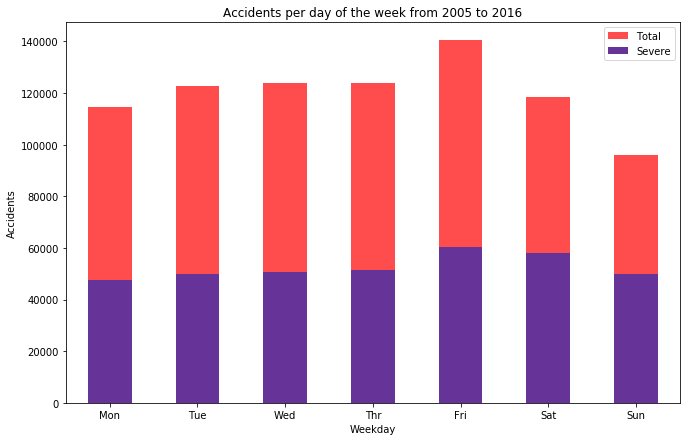

In [24]:
#By day of the week

weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(11,7), alpha=0.7, color='r', label='Total')
weekday['high_sev'].plot.bar(color='rebeccapurple', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thr','Fri','Sat','Sun'), rotation=0)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend();

The trend of highly severe accidents is proportional to the global trend, for both the accidents divided per month of the year and per day of the week.

839985

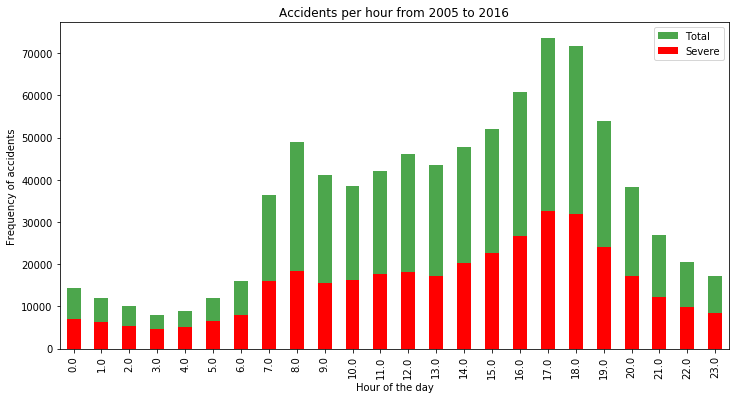

In [25]:
#By hour of the day

hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
hourly['ID'].sum()

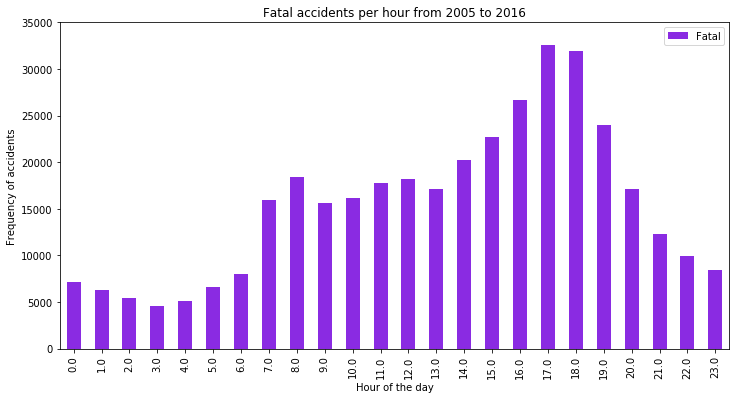

In [26]:
#Zoom in fatal accidents by hour of the day

hourly['high_sev'].plot.bar(figsize=(12,6),color='blueviolet', label='Fatal')
plt.xticks(range(24))
plt.ylim((0,35000))
plt.title('Fatal accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()

Same as for the monthly and weekly trends, zooming on the amount of highly severe accidents by hour of the day we have quite a simliar shape as for the total amount of accidents. One aspect to highlight from the hourly trend is that the proportion of severe accidents from noon to morning is higher. 

In [27]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100

print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 50.67% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 42.41%.


In [28]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [29]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
          ..
839980    21
839981    23
839982    26
839983    27
839984    31
Name: day, Length: 839985, dtype: int64>

### Correlation

In [30]:
df[['sev','lum', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
shape        0.144514
situation    0.128954
weekend      0.077594
traf_reg     0.076691
long_prof    0.069781
dead_age     0.048087
atm          0.048012
num_us       0.027533
col          0.026740
holiday      0.021744
month        0.008851
lum          0.002701
day          0.002161
surf         0.000874
ped         -0.005999
school      -0.025260
crit_age    -0.038168
int         -0.062982
road_cat    -0.100728
num_lanes   -0.101300
dep         -0.105883
agg         -0.277563
Name: sev, dtype: float64

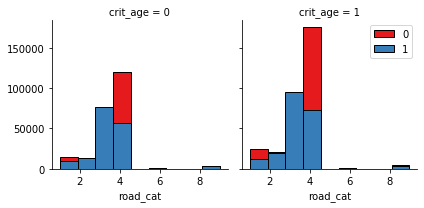

In [31]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

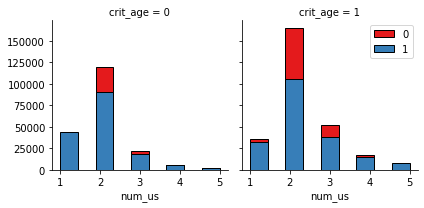

In [32]:
bins = np.linspace(df.lum.min(), df.lum.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

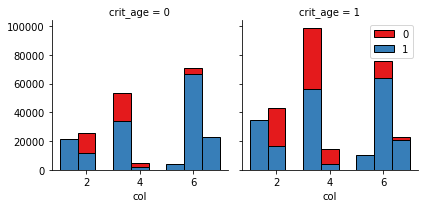

In [33]:
bins = np.linspace(df.col.min(), df.col.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

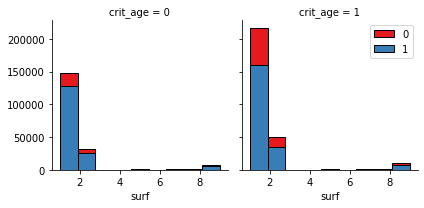

In [34]:
bins = np.linspace(df.surf.min(), df.surf.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'surf', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Text(0.5, 0, 'Severity')

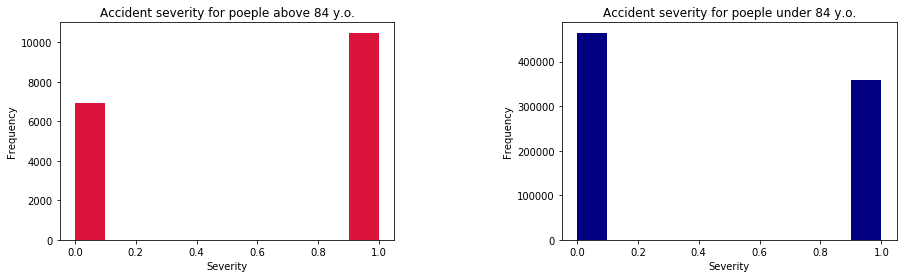

In [57]:
plt.figure(figsize = (15,4))
plt.subplots_adjust(wspace=0.5, hspace=0.2)

plt.subplot(121)
df['sev'][df['dead_age']==1].plot.hist(color='crimson')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

plt.subplot(122)
df['sev'][df['dead_age']==0].plot.hist(color='navy')
plt.title('Accident severity for poeple under 84 y.o.')
plt.xlabel('Severity')

From the correlation of each feature individualy with the severity, there is not a significant correlation in any of the cases. However, from the plots above we can say that gathering together some combinations of the features, these combinations could be classified in the different severity categories.

# 4. Data Preparation <a id=prep>
    
Step just before the model turn of events. The information readiness comprises of the standardization and the train/test/approval split. \
Additionally the models I will use to foresee the seriousness of a mishap doesn't Handel all out factors so date a few highlights will be dropped for the time being.

In [36]:
df.drop(['ID', 'date'], axis=1, inplace=True)

In [37]:
#Some feature's values range from 1 to 9 while others just go either for 1 or 2, 
#Normalizing the data makes that any feature has more influence in the result than others.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('sev', axis=1), df['sev'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 

print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])


Size of training set: 537590 
Size of test set: 167997 
Size of evaluation set: 134398


# 5. Model Develoment <a id='modeling'>

In [38]:
#importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1. Decision Tree

In [60]:
t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Time taken : 4.024271726608276
Accuracy : 0.6324796499947916


### 1.1. Random Forest
To go a bit further I will develop a Random Forest model. A random forest fits a number of **decision tree** classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of decision trees is specified with the `n_estimators` parameter.\
An upside of this algorithm is its `feature_importances_` atribut, it returns the impurity based feature importance.

In [61]:
#RF 1

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 42.782530307769775
Accuracy : 0.7053601988124824


In [ ]:
importances = pd.DataFrame({'feature':df.drop('sev', axis=1).columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

The objective will presently be to improve the precision and running season of the model gratitude to highlight determination and hyperparameter tuning. So I will drop the 10 least significant highlights and run the model once more

In [42]:
xtrain = pd.DataFrame(xtrain)
xtrain.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof','lum','atm'], axis=1, inplace=True)
xval.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)
xtest.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age','surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)

In [43]:
#RF 2:
#number of features reduced from 23 to 13

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 53.713287591934204
Accuracy : 0.7053601988124824


In [44]:
#RF 3:

#number of decision trees reduced from 100 to 50
#Limiting the number of features to look at when creating the next split to 5
#Limiting the max depth of the tree to 10


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 22.137768983840942
Accuracy : 0.71548683760175


In [45]:
#RF 4:

#number of decision trees reduced from 50 to 10
#Limiting the number of features to look at when creating the next split to 8
#Limiting the max depth of the tree to 12


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 8.26887583732605
Accuracy : 0.722466108126609


In [46]:
#Evaluation

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(xtest)
jaccard_rf = jaccard_similarity_score(ytest,yhat_rf)
c_rf = classification_report(ytest,yhat_rf)
prec_rf = precision_score(ytest, yhat_rf)
rec_rf = recall_score(ytest, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 7.576102256774902
Jaccard : 0.7237391143889474 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77     94297
           1       0.72      0.60      0.66     73700

    accuracy                           0.72    167997
   macro avg       0.72      0.71      0.71    167997
weighted avg       0.72      0.72      0.72    167997



The last model has equaled the computational time of the Decision Tree model improving the accuracy from 0.63 to 0.72.

### 2. LogisticRegression

First I'll look for the best regularization coefficient then I create the model.

In [47]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.65842498, 0.65840265, 0.65870028, 0.6602256 , 0.65842498,
       0.65842498])

In [48]:
#Evaluation

t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 6.882585048675537
Jaccard : 0.6618808669202426 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     94297
           1       0.67      0.46      0.54     73700

    accuracy                           0.66    167997
   macro avg       0.66      0.64      0.64    167997
weighted avg       0.66      0.66      0.65    167997



### 3. KNN

Firstly I will search for the best performing K and then I will fit the model with the training set and evaluat it with the test set.  
Due to the size of the dataset, I will reduce the training and evaluation sets to the half of them in the process of searching for the optim K.

In [49]:
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(268795, 67199)

In [50]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 15 with an accuracy of 0.6539531838271403


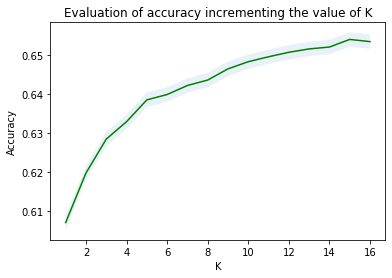

In [51]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [52]:
#Evaluation

t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 16, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 248.62695479393005
Jaccard : 0.6657321261689196 
               precision    recall  f1-score   support

           0       0.67      0.79      0.73     94297
           1       0.65      0.51      0.57     73700

    accuracy                           0.67    167997
   macro avg       0.66      0.65      0.65    167997
weighted avg       0.66      0.67      0.66    167997



### 4. SVM

In [ ]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

In [ ]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

In [ ]:
plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.2)

plt.subplot(121)
performance.plot(y='acc', color='b', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')

plt.subplot(122)
performance.plot(y='time', color='r', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [ ]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

# 7. Results <a id='results'>
    
    
|**Algorithm**|**Jaccard**|**f1-score**|**Precision**|**Recall**|**Time(s)**|
|---------|-------|----|-------------|------|-------|
|**Random Forest**| 0.722  | 0.72  | 0.724  | 0.591  |  6.588 |
|**Logistic Regression**|  0.661 |  0.65 |  0.667 | 0.456  | 6.530 |
|**KNN**| 0.664  | 0.66  |  0.652 | 0.506  |  200.58 |
|**SVM**| 0.659  | 0.65  |  0.630 |  0.528 |  403.92 |

For this specific problem *precision* means the % of predicted severe accidents that were truly severe. The *recall* instead, is the % of truly severe accidents that were properly predicted. For this specific problem, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident.\
In this case, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident. The *logistic regression*, *KNN*, and *SVM* models have similar accuracy, however the computational time from the regression is far better than the other two models. With no doubt the *Random Forest* is the best model, in the same time as the *log. res.* it improves the accuracy from 0.66 to 0.72 and the recall from 0.45 to 0.59.

    

In [ ]:
print('Jaccard:',jaccard_rf,'Precision:',prec_rf,'Recall:',rec_rf)
print('Jaccard:',jaccard_lr,'Precision:',prec_lr,'Recall:',rec_lr)
print('Jaccard:',jaccard_knn,'Precision:',prec_knn,'Recall:',rec_knn)
print('Jaccard:',jaccard_svm,'Precision:',prec_svm,'Recall:',rec_svm)

In [ ]:
#ROC curve.

yscores = model_rf.predict_proba(xtest)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest.values, yscores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 10))
plt.title('ROC curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()